In [4]:
import pandas as pd
import datetime
import pickle
import matplotlib
from basic_analysis_toolkit import BasicAnalysis
import numpy
from portfolio_toolkit import *

In [5]:
start = datetime.date(day=1, month=1, year=2018)
end = datetime.date(day=1, month=9, year=2019)
stock_dataframe = pickle.load(open('stock_dataframe.pickle', 'rb'))
analysis = BasicAnalysis(stock_dataframe)
cd = pickle.load(open('company_dictionary.pickle', 'rb'))

In [6]:
p = Portfolio({'AAPL': {'Date': start, 'No of Shares': 200, 'Initial Market Value': 1}
              ,'AMZN': {'Date': start, 'No of Shares': 20, 'Initial Market Value': 1}
              ,'FB': {'Date': start, 'No of Shares': 100, 'Initial Market Value': 1}
              ,'ADBE': {'Date': start, 'No of Shares': 200, 'Initial Market Value': 1}
              ,'GOOGL': {'Date': start, 'No of Shares': 20, 'Initial Market Value': 1}
              ,'MSFT': {'Date': start, 'No of Shares': 20, 'Initial Market Value': 1}})

In [9]:
# returns a graph of the historical value of the portfolio along with the individual investments
cd.get('AAPL').cash_flow

,Net Income,Depreciation,Adjustments To Net Income,Changes In Accounts Receivables,Changes In Liabilities,Changes In Inventories,Changes In Other Operating Activities,Total Cash Flow From Operating Activities,Capital Expenditure,Investments,Other Cash flows from Investing Activities,Total Cash Flows From Investing Activities,Dividends Paid,Sale Purchase of Stock,Net Borrowings,Other Cash Flows from Financing Activities,Total Cash Flows From Financing Activities,Effect Of Exchange Rate Changes,Change In Cash and Cash Equivalents
Period Ending,,,,,,,,,,,,,,,,,,,
2018-09-29,59531000,10903000,-27694000,-5322000,9131000,828000,30057000,77434000,-13313000,30845000,-745000,16066000,-13712000,-,432000,-,-87876000,-,5624000
2017-09-30,48351000,10157000,10640000,-2093000,8340000,-2723000,-8447000,64225000,-12451000,-33542000,-124000,-46446000,-12769000,-,29014000,-,-17974000,-,-195000
2016-09-24,45687000,10505000,9634000,527000,563000,217000,-902000,66231000,-12734000,-32022000,-924000,-45977000,-12150000,-,22057000,-,-20890000,-,-636000
2015-09-26,53394000,11257000,5353000,417000,6043000,-238000,5040000,81266000,-11247000,-44417000,-26000,-56274000,-11561000,-,29305000,749000,-17716000,-,7276000


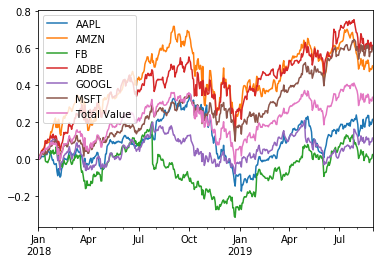

In [14]:
# gets a dataframe of the returns of the portfolio
p.get_return_df(analysis, end).plot()

In [19]:
# given the covariance matrix of a list of stocks, computes the optimal portfolio based on the minimum variance
cov_matrix = analysis.create_historical_cov_matrix(list(p.overview.columns), start, end, 'BM')
min_var_opt(cov_matrix)

AAPL    -0.099551
AMZN    -0.306926
FB      -0.008264
ADBE     0.434759
GOOGL    0.386076
MSFT     0.593906
dtype: float64

In [24]:
# computes the mean variance weights of a list of tickers
cov_matrix = analysis.create_historical_cov_matrix(list(p.overview.columns), start, end, 'BM')
forecasts = analysis.get_percent_changes(list(p.overview.columns), start - datetime.timedelta(days=365), start, 'BM').mean()
mean_var_opt(1, forecasts, cov_matrix, False)

AAPL     -0.877615
AMZN      0.492137
FB       -2.148405
ADBE     11.663685
GOOGL    -0.476177
MSFT     -7.653625
dtype: float64